In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Concatenate, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import roc_auc_score

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
user_ids = ratings['userId'].unique()
user_id_map = {old_id: new_id for new_id, old_id in enumerate(user_ids)}
movie_ids = ratings['movieId'].unique()
movie_id_map = {old_id: new_id for new_id, old_id in enumerate(movie_ids)}

ratings['userId'] = ratings['userId'].map(user_id_map)
ratings['movieId'] = ratings['movieId'].map(movie_id_map)

In [4]:
num_users = len(user_ids)
num_movies = len(movie_ids)
embedding_size = 50

dense_units=128
dropout_rate=0.0
user_input = Input(shape=(1,))
movie_input = Input(shape=(1,))

user_embedding = Embedding(num_users, embedding_size)(user_input)
movie_embedding = Embedding(num_movies, embedding_size)(movie_input)

user_vecs = Flatten()(user_embedding)
movie_vecs = Flatten()(movie_embedding)

dot_product = Dot(axes=1)([user_vecs, movie_vecs])
dense_layer_1 = Dense(dense_units, activation='relu')(dot_product)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
    
output = Dense(1)(dense_layer_3)
model = Model(inputs=[user_input, movie_input], outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam')






In [81]:
X = [ratings['userId'], ratings['movieId']]
y = ratings['rating']
model.fit(X, y, epochs=15, batch_size=64, validation_split=0.2, validation_data=(X, y))

Epoch 1/15
1576/1576 [==============================] - 12s 8ms/step - loss: 0.1711 - val_loss: 0.1363
Epoch 2/15
1576/1576 [==============================] - 12s 8ms/step - loss: 0.1388 - val_loss: 0.1165
Epoch 3/15
1576/1576 [==============================] - 11s 7ms/step - loss: 0.1190 - val_loss: 0.0999
Epoch 4/15
1576/1576 [==============================] - 12s 7ms/step - loss: 0.1028 - val_loss: 0.0862
Epoch 5/15
1576/1576 [==============================] - 12s 7ms/step - loss: 0.0877 - val_loss: 0.0748
Epoch 6/15
1576/1576 [==============================] - 12s 7ms/step - loss: 0.0760 - val_loss: 0.0635
Epoch 7/15
1576/1576 [==============================] - 11s 7ms/step - loss: 0.0669 - val_loss: 0.0565
Epoch 8/15
1576/1576 [==============================] - 12s 7ms/step - loss: 0.0604 - val_loss: 0.0509
Epoch 9/15
1576/1576 [==============================] - 12s 7ms/step - loss: 0.0550 - val_loss: 0.0484
Epoch 10/15
1576/1576 [==============================] - 11s 7ms/step - l

In [82]:
user_id = 5
user_movies = ratings[ratings['userId'] == user_id]['movieId'].values
user_unrated_movies = np.setdiff1d(movie_ids, user_movies)

movie_scores = []
for movie_id in user_unrated_movies:
    movie_score = model.predict([np.array([user_id]), np.array([movie_id])])[0][0]
    movie_scores.append((movie_id, movie_score))


1/1 [==============================] - 0s 20ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'model/embedding_1/embedding_lookup' defined at (most recent call last):
    File "F:\Anaconda\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "F:\Anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "F:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "F:\Anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "F:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "F:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "F:\Anaconda\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "F:\Anaconda\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "F:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "F:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "F:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "F:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "F:\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "F:\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "F:\Anaconda\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Nirvik\AppData\Local\Temp\ipykernel_12536\3639627205.py", line 7, in <module>
      movie_score = model.predict([np.array([user_id]), np.array([movie_id])])[0][0]
    File "F:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "F:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "F:\Anaconda\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\lib\site-packages\keras\layers\core\embedding.py", line 199, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model/embedding_1/embedding_lookup'
indices[0,0] = 25746 is not in [0, 9724)
	 [[{{node model/embedding_1/embedding_lookup}}]] [Op:__inference_predict_function_96106]

In [83]:
top_n = 10
recommended_movies = sorted(movie_scores, key=lambda x: x[1], reverse=True)[:top_n]

In [84]:
recommended_movie_titles = []
for movie_id, _ in recommended_movies:
    movie_entry = movies[movies['movieId'] == movie_id_map.get(movie_id)]
    if not movie_entry.empty:
        recommended_movie_titles.append(movie_entry['title'].values[0])
    else:
        continue

In [85]:
print("Recommended movies for user {}:".format(user_id))
for i, movie_title in enumerate(recommended_movie_titles):
    print("{}. {}".format(i + 1, movie_title))

Recommended movies for user 5:
1. Thirty-Two Short Films About Glenn Gould (1993)
2. Tombstone (1993)
3. The Machinist (2004)
4. Heat (1995)
5. Panic (2000)
6. Party Girl (1995)
7. Crooklyn (1994)
8. Father of the Bride Part II (1995)
9. For a Few Dollars More (Per qualche dollaro in più) (1965)
10. Days of Thunder (1990)


In [86]:
from sklearn.metrics import mean_squared_error 
val_predictions = model.predict(X)
val_mse = mean_squared_error(y, val_predictions)
print("Mean Squared Error (MSE) on validation data: {:.4f}".format(val_mse))

3152/3152 [==============================] - 3s 936us/step
Mean Squared Error (MSE) on validation data: 0.0359


In [87]:
from sklearn.metrics import roc_auc_score
threshold = 4.5
binary_val_predictions = [1 if rating >= threshold else 0 for rating in val_predictions]
auc_score = roc_auc_score(y > threshold, binary_val_predictions)
print("AUC Score on validation data: {:.4f}".format(auc_score))

AUC Score on validation data: 0.9453


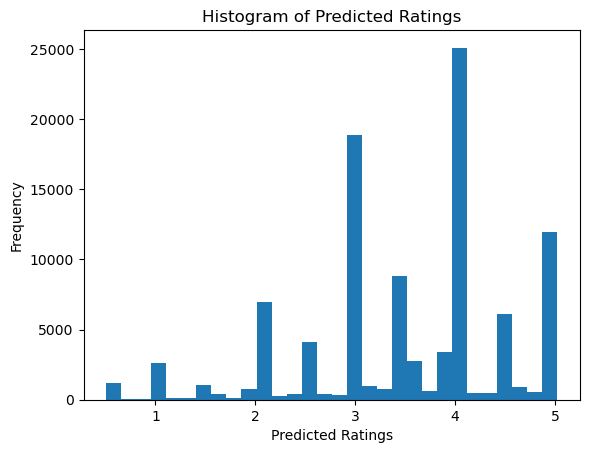

In [89]:
plt.hist(val_predictions, bins=30)
plt.title('Histogram of Predicted Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.show()

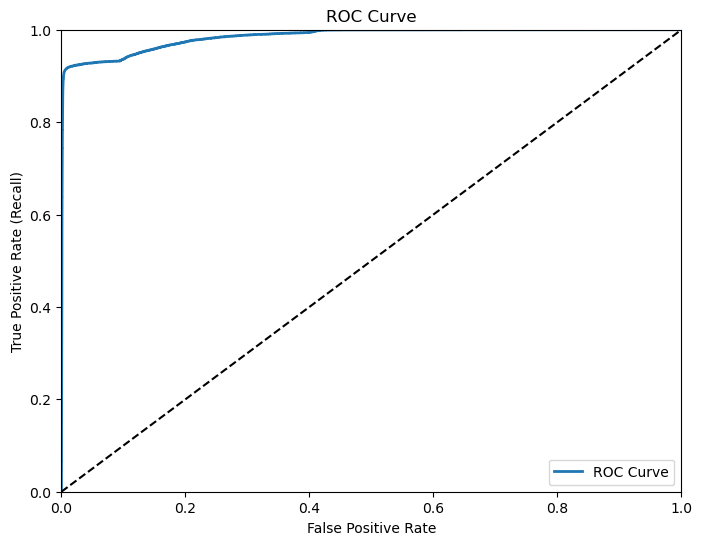

In [93]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y > threshold, val_predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()